In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

import time
import timeit
#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor



import matplotlib.pyplot as plt

In [2]:
df_car=pd.read_excel('cleaned_data_new_1.xlsx')

In [3]:
df_car.shape

(1612, 17)

In [4]:
df_car['Model'].unique()

array(['Toyota Corolla', 'Toyota Tundra', 'Ford Fusion', 'Honda CR-V',
       'Nissan Altima', 'Ford Escape', 'Chevrolet Volt', 'Nissan GT-R',
       'Chevrolet Bolt', 'Chevrolet Impala', 'Toyota Prius',
       'Honda Pilot', 'Toyota Camry', 'Nissan Juke', 'Nissan Murano',
       'Chevrolet Corvette', 'Honda Accord', 'Chevrolet Camaro',
       'Nissan 350Z', 'Chevrolet Sonic', 'Ford Mustang', 'Honda Fit',
       'Nissan Titan'], dtype=object)

In [5]:
#df_car_new['Model'] = df_car_new['Model'].replace({'Camary': 'Camry'})

In [6]:
# Feature engineering
df_car['Age'] = 2024 - df_car['Year']  # Calculate the age of the car
#df['Warranty_Percentage_Remaining'] = df['warrenty remaining'] / df['Warranty']  # Calculate percentage of warranty remaining
df_car['Interaction_Age_Mileage'] = df_car['Age'] * df_car['Estimated_Mileage']  # Interaction term between age and mileage
df_car['Log_Weight'] = np.log(df_car['Weight'])  # Log transformation of Weight
#df['Car_Class'] = pd.cut(df['carlength'] * df['carwidth'], bins=3, labels=['Compact', 'Mid-size', 'Full-size'])  # Create car class based on dimensions


In [7]:
df_car.columns

Index(['Model', 'Year', 'Fuel_Type', 'Transmission', 'Owners', 'Insurance',
       'Price', 'Condition', 'Safety', 'Warranty', 'Cylinder_Numbers',
       'Estimated_Mileage', 'TAge', 'carlength', 'carwidth', 'Weight',
       'engine_size_cc', 'Age', 'Interaction_Age_Mileage', 'Log_Weight'],
      dtype='object')

In [8]:
df_car_new=df_car.loc[:,['Model','Fuel_Type','Transmission','Owners','Insurance','Price','Condition','Safety','Warranty','Cylinder_Numbers','TAge','carlength','carwidth','Weight','engine_size_cc','Age','Interaction_Age_Mileage','Log_Weight']]


In [9]:
df_car_new.head()

,Model,Fuel_Type,Transmission,Owners,Insurance,Price,Condition,Safety,Warranty,Cylinder_Numbers,TAge,carlength,carwidth,Weight,engine_size_cc,Age,Interaction_Age_Mileage,Log_Weight
0,Toyota Corolla,Electric,Manual,1,No,25385.241860,Excellent,5 stars,20,two,1,182.1,60.0,3543.006290,2696.625886,5,53684.55635,8.172731
1,Toyota Corolla,Electric,Manual,1,Collision,24381.083350,Good,3 stars,8,three,1,169.7,65.2,3340.060049,2044.309359,4,49787.90276,8.113744
2,Toyota Tundra,Hybrid,Automatic,1,Comprehensive,28357.830640,Good,5 stars,35,five,1,176.0,68.1,3847.825597,2586.011338,7,73923.84328,8.255263
3,Ford Fusion,Hybrid,Automatic,1,Comprehensive,20165.480380,Fair,4 stars,18,five,1,188.7,70.3,3365.398982,2378.832784,14,266759.72302,8.121302
4,Honda CR-V,Petrol,Manual,4,No,5993.991374,Fair,1 star,18,three,2,156.1,71.4,3384.373776,1986.830155,18,795055.68396,8.126924


In [10]:
# df_final_encoded= pd.get_dummies(df_car_new[['Fuel_Type', 'Transmission','Condition','Safety','Cylinder_Numbers','Owners']])
# # Concatenate the original DataFrame with the encoded columns
# df_encoded = pd.concat([df_car_new,df_final_encoded], axis=1)
# df_encoded.columns

# # Drop the original categorical columns that have been encoded
# df_encoded.drop(columns=['Fuel_Type', 'Transmission', 'Condition','Safety','Cylinder_Numbers','Owners'], inplace=True)
# df_encoded.head()


In [11]:
#df_encoded.columns

In [12]:
df_car_new

,Model,Fuel_Type,Transmission,Owners,Insurance,Price,Condition,Safety,Warranty,Cylinder_Numbers,TAge,carlength,carwidth,Weight,engine_size_cc,Age,Interaction_Age_Mileage,Log_Weight
0,Toyota Corolla,Electric,Manual,1,No,25385.241860,Excellent,5 stars,20,two,1,182.1,60.0,3543.006290,2696.625886,5,53684.55635,8.172731
1,Toyota Corolla,Electric,Manual,1,Collision,24381.083350,Good,3 stars,8,three,1,169.7,65.2,3340.060049,2044.309359,4,49787.90276,8.113744
2,Toyota Tundra,Hybrid,Automatic,1,Comprehensive,28357.830640,Good,5 stars,35,five,1,176.0,68.1,3847.825597,2586.011338,7,73923.84328,8.255263
3,Ford Fusion,Hybrid,Automatic,1,Comprehensive,20165.480380,Fair,4 stars,18,five,1,188.7,70.3,3365.398982,2378.832784,14,266759.72302,8.121302
4,Honda CR-V,Petrol,Manual,4,No,5993.991374,Fair,1 star,18,three,2,156.1,71.4,3384.373776,1986.830155,18,795055.68396,8.126924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,Toyota Prius,Hybrid,Manual,1,No,27432.761260,Good,4 stars,20,three,3,178.4,61.0,3970.307055,2490.927676,15,117232.52307,8.286599
1608,Nissan Titan,Petrol,Manual,2,Collision,7623.975722,Good,1 star,10,three,5,157.9,63.0,3565.295621,2181.474184,23,871191.05416,8.179002
1609,Chevrolet Sonic,Electric,Automatic,4,Comprehensive,15164.228470,Good,2 stars,11,two,4,194.4,71.1,4157.519949,2238.645129,11,270733.13487,8.332674
1610,Chevrolet Sonic,Hybrid,Automatic,1,Third Party,21614.535620,Excellent,4 stars,30,four,2,146.5,66.9,3503.415954,2355.597609,12,187317.94464,8.161494


C:\Users\Joydeep\AppData\Local\Temp\ipykernel_29008\3188888186.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap_data = df_car_new[numeric_columns].corr()


<Axes: >

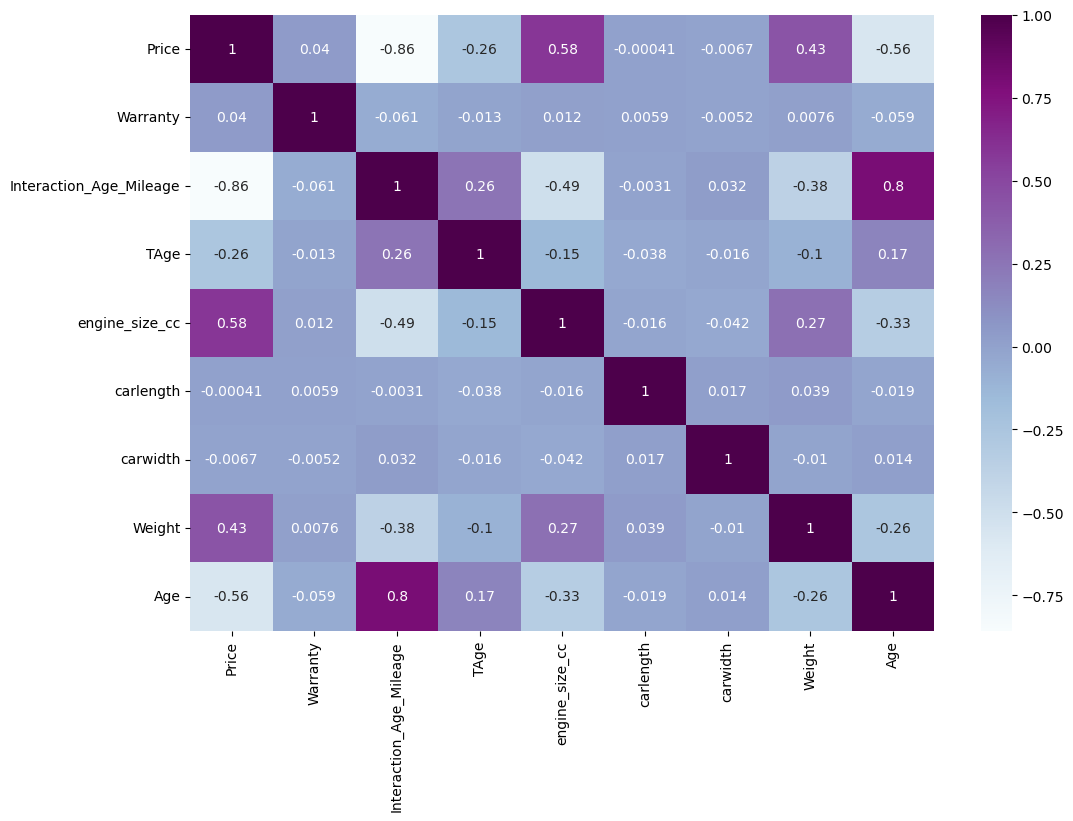

In [13]:
plt.figure(figsize = (12, 8))
numeric_columns = ['Price', 'Warranty', 'Cylinder_Numbers', 'Interaction_Age_Mileage', 'TAge', 'engine_size_cc','carlength','carwidth','Weight','Age']
heatmap_data = df_car_new[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

In [14]:
#no relationship with warrenty,carlength,carwidth.

In [15]:
df_final = df_car_new.drop(columns=['carlength','carwidth','Warranty'])

In [16]:
df_final.head()

,Model,Fuel_Type,Transmission,Owners,Insurance,Price,Condition,Safety,Cylinder_Numbers,TAge,Weight,engine_size_cc,Age,Interaction_Age_Mileage,Log_Weight
0,Toyota Corolla,Electric,Manual,1,No,25385.241860,Excellent,5 stars,two,1,3543.006290,2696.625886,5,53684.55635,8.172731
1,Toyota Corolla,Electric,Manual,1,Collision,24381.083350,Good,3 stars,three,1,3340.060049,2044.309359,4,49787.90276,8.113744
2,Toyota Tundra,Hybrid,Automatic,1,Comprehensive,28357.830640,Good,5 stars,five,1,3847.825597,2586.011338,7,73923.84328,8.255263
3,Ford Fusion,Hybrid,Automatic,1,Comprehensive,20165.480380,Fair,4 stars,five,1,3365.398982,2378.832784,14,266759.72302,8.121302
4,Honda CR-V,Petrol,Manual,4,No,5993.991374,Fair,1 star,three,2,3384.373776,1986.830155,18,795055.68396,8.126924


In [17]:
df_final['Cylinder_Numbers'].unique()

array(['two', 'three', 'five', 'four', 'six'], dtype=object)

In [18]:
numeric_columns = ['Interaction_Age_Mileage', 'Log_Weight', 
                    'engine_size_cc', 'TAge','Age']
# Preprocessing for numerical and categorical features
numeric_features = df_final[numeric_columns]
                    


# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical data and transform it
scaled_data = scaler.fit_transform(numeric_features)


#Replace the original numerical features with the scaled ones
df_scaled =  pd.DataFrame(scaled_data, columns=numeric_columns)
# Update the original DataFrame with the scaled values
df_final[numeric_columns] = df_scaled

In [19]:
df_final.columns

Index(['Model', 'Fuel_Type', 'Transmission', 'Owners', 'Insurance', 'Price',
       'Condition', 'Safety', 'Cylinder_Numbers', 'TAge', 'Weight',
       'engine_size_cc', 'Age', 'Interaction_Age_Mileage', 'Log_Weight'],
      dtype='object')

In [20]:
df_encoded= pd.get_dummies(df_final[['Fuel_Type', 'Transmission','Condition','Safety','Cylinder_Numbers','Insurance']])
# Concatenate the original DataFrame with the encoded columns
df_final_encoded = pd.concat([df_final,df_encoded], axis=1)
df_final_encoded.columns




Index(['Model', 'Fuel_Type', 'Transmission', 'Owners', 'Insurance', 'Price',
       'Condition', 'Safety', 'Cylinder_Numbers', 'TAge', 'Weight',
       'engine_size_cc', 'Age', 'Interaction_Age_Mileage', 'Log_Weight',
       'Fuel_Type_Electric', 'Fuel_Type_Hybrid', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Condition_Excellent',
       'Condition_Fair', 'Condition_Good', 'Safety_1 star', 'Safety_2 stars',
       'Safety_3 stars', 'Safety_4 stars', 'Safety_5 stars',
       'Cylinder_Numbers_five', 'Cylinder_Numbers_four',
       'Cylinder_Numbers_six', 'Cylinder_Numbers_three',
       'Cylinder_Numbers_two', 'Insurance_3rd Party', 'Insurance_Collision',
       'Insurance_Comprehensive', 'Insurance_No', 'Insurance_Third Party'],
      dtype='object')

In [21]:
df_final_encoded

,Model,Fuel_Type,Transmission,Owners,Insurance,Price,Condition,Safety,Cylinder_Numbers,TAge,...,Cylinder_Numbers_five,Cylinder_Numbers_four,Cylinder_Numbers_six,Cylinder_Numbers_three,Cylinder_Numbers_two,Insurance_3rd Party,Insurance_Collision,Insurance_Comprehensive,Insurance_No,Insurance_Third Party
0,Toyota Corolla,Electric,Manual,1,No,25385.241860,Excellent,5 stars,two,-0.328138,...,0,0,0,0,1,0,0,0,1,0
1,Toyota Corolla,Electric,Manual,1,Collision,24381.083350,Good,3 stars,three,-0.328138,...,0,0,0,1,0,0,1,0,0,0
2,Toyota Tundra,Hybrid,Automatic,1,Comprehensive,28357.830640,Good,5 stars,five,-0.328138,...,1,0,0,0,0,0,0,1,0,0
3,Ford Fusion,Hybrid,Automatic,1,Comprehensive,20165.480380,Fair,4 stars,five,-0.328138,...,1,0,0,0,0,0,0,1,0,0
4,Honda CR-V,Petrol,Manual,4,No,5993.991374,Fair,1 star,three,-0.172973,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,Toyota Prius,Hybrid,Manual,1,No,27432.761260,Good,4 stars,three,-0.017807,...,0,0,0,1,0,0,0,0,1,0
1608,Nissan Titan,Petrol,Manual,2,Collision,7623.975722,Good,1 star,three,0.292523,...,0,0,0,1,0,0,1,0,0,0
1609,Chevrolet Sonic,Electric,Automatic,4,Comprehensive,15164.228470,Good,2 stars,two,0.137358,...,0,0,0,0,1,0,0,1,0,0
1610,Chevrolet Sonic,Hybrid,Automatic,1,Third Party,21614.535620,Excellent,4 stars,four,-0.172973,...,0,1,0,0,0,0,0,0,0,1


In [22]:
# Drop the original categorical columns that have been encoded
df_final_encoded.drop(columns=['Fuel_Type', 'Transmission', 'Condition','Safety','Cylinder_Numbers'], inplace=True)
df_final_encoded.head()

,Model,Owners,Insurance,Price,TAge,Weight,engine_size_cc,Age,Interaction_Age_Mileage,Log_Weight,...,Cylinder_Numbers_five,Cylinder_Numbers_four,Cylinder_Numbers_six,Cylinder_Numbers_three,Cylinder_Numbers_two,Insurance_3rd Party,Insurance_Collision,Insurance_Comprehensive,Insurance_No,Insurance_Third Party
0,Toyota Corolla,1,No,25385.241860,-0.328138,3543.006290,0.951011,-1.493401,-1.005970,0.112313,...,0,0,0,0,1,0,0,0,1,0
1,Toyota Corolla,1,Collision,24381.083350,-0.328138,3340.060049,-0.780207,-1.671803,-1.020903,-0.582832,...,0,0,0,1,0,0,1,0,0,0
2,Toyota Tundra,1,Comprehensive,28357.830640,-0.328138,3847.825597,0.657445,-1.136596,-0.928405,1.084939,...,1,0,0,0,0,0,0,1,0,0
3,Ford Fusion,1,Comprehensive,20165.480380,-0.328138,3365.398982,0.107603,0.112221,-0.189383,-0.493766,...,1,0,0,0,0,0,0,1,0,0
4,Honda CR-V,4,No,5993.991374,-0.172973,3384.373776,-0.932754,0.825830,1.835252,-0.427508,...,0,0,0,1,0,0,0,0,1,0


In [23]:
from sklearn.preprocessing import LabelEncoder
# 20 categories are there in model so doing label encoding
# Assuming 'data' is your dataset containing the 'model' column


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df_final_encoded['Model_encoded'] = label_encoder.fit_transform(df_final_encoded['Model'])

In [24]:
df_final_encoded.head()

,Model,Owners,Insurance,Price,TAge,Weight,engine_size_cc,Age,Interaction_Age_Mileage,Log_Weight,...,Cylinder_Numbers_four,Cylinder_Numbers_six,Cylinder_Numbers_three,Cylinder_Numbers_two,Insurance_3rd Party,Insurance_Collision,Insurance_Comprehensive,Insurance_No,Insurance_Third Party,Model_encoded
0,Toyota Corolla,1,No,25385.241860,-0.328138,3543.006290,0.951011,-1.493401,-1.005970,0.112313,...,0,0,0,1,0,0,0,1,0,20
1,Toyota Corolla,1,Collision,24381.083350,-0.328138,3340.060049,-0.780207,-1.671803,-1.020903,-0.582832,...,0,0,1,0,0,1,0,0,0,20
2,Toyota Tundra,1,Comprehensive,28357.830640,-0.328138,3847.825597,0.657445,-1.136596,-0.928405,1.084939,...,0,0,0,0,0,0,1,0,0,22
3,Ford Fusion,1,Comprehensive,20165.480380,-0.328138,3365.398982,0.107603,0.112221,-0.189383,-0.493766,...,0,0,0,0,0,0,1,0,0,7
4,Honda CR-V,4,No,5993.991374,-0.172973,3384.373776,-0.932754,0.825830,1.835252,-0.427508,...,0,0,1,0,0,0,0,1,0,10


In [25]:
df=df_final_encoded.drop(columns=['Model'])

In [26]:
df.drop(columns=['Insurance'],inplace=True)

In [27]:
df['Owners'] = pd.Categorical(df['Owners'])
# Convert the 'Owners' column into dummy variables
owners_dummies = pd.get_dummies(df['Owners'], prefix='Owner')
owners_dummies
df_car = pd.concat([df, owners_dummies], axis=1)

In [28]:
df_car.drop(columns=['Owners'],inplace=True)

In [29]:
df_car.drop(columns=['Weight'],inplace=True)

In [30]:
train_set, test_set = train_test_split(df_car, test_size = 0.20, random_state = 42)


In [31]:
# Separating target labels from the rest
# xtrain = train_set.drop("Price", axis=1) #train without target xtrain
# ytrain = train_set["Price"].copy() #target,ytrain

# xtest  = test_set.drop("Price", axis=1)#x_test
# ytest = test_set["Price"].copy() #ytest

ytrain=train_set["Price"].copy()
xtrain = train_set.drop("Price", axis=1)

ytest=test_set["Price"].copy()
xtest = test_set.drop("Price", axis=1)

In [32]:
xtrain.reset_index(drop=True, inplace=True)
ytrain.reset_index(drop=True, inplace=True)
xtest.reset_index(drop=True, inplace=True)
ytest.reset_index(drop=True, inplace=True)

In [33]:
xtrain.columns

Index(['TAge', 'engine_size_cc', 'Age', 'Interaction_Age_Mileage',
       'Log_Weight', 'Fuel_Type_Electric', 'Fuel_Type_Hybrid',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Condition_Excellent', 'Condition_Fair', 'Condition_Good',
       'Safety_1 star', 'Safety_2 stars', 'Safety_3 stars', 'Safety_4 stars',
       'Safety_5 stars', 'Cylinder_Numbers_five', 'Cylinder_Numbers_four',
       'Cylinder_Numbers_six', 'Cylinder_Numbers_three',
       'Cylinder_Numbers_two', 'Insurance_3rd Party', 'Insurance_Collision',
       'Insurance_Comprehensive', 'Insurance_No', 'Insurance_Third Party',
       'Model_encoded', 'Owner_1', 'Owner_2', 'Owner_3', 'Owner_4'],
      dtype='object')

In [34]:
#BASELINE PREDICTION OF THE MODEL 
median_price = ytrain.median()
median_price

20165.48038

In [35]:
# each value in yhat will be the same value, median_price
yhat = np.full((ytrain.shape[0], 1), median_price)
yhat[:10]

array([[20165.48038],
       [20165.48038],
       [20165.48038],
       [20165.48038],
       [20165.48038],
       [20165.48038],
       [20165.48038],
       [20165.48038],
       [20165.48038],
       [20165.48038]])

In [36]:
from sklearn.metrics import mean_squared_error

yhat = np.full((ytest.shape[0], 1), median_price)

baseline_test_mse = mean_squared_error(ytest, yhat)
baseline_test_Rmse = np.sqrt(baseline_test_mse)
baseline_MAE=mean_absolute_error(ytest, yhat)
print("Mean Squared Error (MSE):", baseline_test_mse)
print("Root Mean Squared Error (RMSE):", baseline_test_Rmse)
print("MAE:",baseline_MAE)

Mean Squared Error (MSE): 67106560.28402393
Root Mean Squared Error (RMSE): 8191.859391128728
MAE: 6826.37948525387


In [64]:
# Define and train the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(xtrain, ytrain)# model is learning from the labelled data

# Predict on training and test sets
y_train_pred = tree_reg.predict(xtrain)
y_test_pred = tree_reg.predict(xtest)

# Calculate RMSE for training and test sets
rmse_train_DT = np.sqrt(mean_squared_error(ytrain, y_train_pred))
rmse_DT_test = np.sqrt(mean_squared_error(ytest, y_test_pred))
DT_MAE=mean_absolute_error(ytest, y_test_pred)
print("RMSE on training set:", rmse_train_DT)
print("RMSE on Decision Tree TEST:", rmse_DT_test)
print("MAE on Decision Tree:",DT_MAE)
from sklearn.metrics import r2_score

Rsquare_DT = r2_score(ytest, y_test_pred, multioutput='variance_weighted') 
print("R2 value on Decision Tree:",Rsquare_DT)    

RMSE on training set: 0.0
RMSE on Decision Tree TEST: 3517.857135207086
MAE on Decision Tree: 2419.166909656347
R2 value on Decision Tree: 0.8130538361872457


In [55]:
# random forest HP,random_state=42 VS 7
# Create a Random Forest Regressor object
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed

# Train the Random Forest model on the training set
rf_reg.fit(xtrain, ytrain)

# Predict on the training set
y_train_pred = rf_reg.predict(xtrain)

# Predict on the test set
y_test_pred = rf_reg.predict(xtest)



# Calculate RMSE for training and test sets
rmse_train_RF = np.sqrt(mean_squared_error(ytrain, y_train_pred))
rmse_test_RF = np.sqrt(mean_squared_error(ytest, y_test_pred))
MAE_rf=mean_absolute_error(ytest, y_test_pred)
Rsquare_rf=r2_score(ytest, y_test_pred, multioutput='variance_weighted') 
    



print("RMSE on test set:", rmse_rf)
print("MAE on testset:",MAE_rf)
print("r^2:",Rsquare_rf)
print("RMSE on training set:", rmse_train)


RMSE on test set: 2474.8886236914773
MAE on testset: 1727.1369323473066
r^2: 0.907472361113666
RMSE on training set: 856.9682114188369


In [65]:
# Initialize SVR model
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')  # 'rbf' kernel is commonly used for SVR

# Train the SVR model on the training data
svr_model.fit(xtrain, ytrain)
# Predict on the training set
y_train_pred = svr_model.predict(xtrain)

# Predict on the test data
y_test_pred_svm = svr_model.predict(xtest)

# Calculate RMSE for training and test data
test_rmse = mean_squared_error(ytest, y_test_pred_svm, squared=False)
train_rmse = mean_squared_error(ytrain, y_train_pred, squared=False)
MAE=mean_absolute_error(ytest, y_test_pred_svm)
Rsquare_rf=r2_score(ytest, y_test_pred_svm, multioutput='variance_weighted') 
print("Root Mean Squared Error TEST (RMSE) for SVM:", test_rmse)
print("RMSE on training set:", train_rmse)

print("MAE on SVM:",MAE)
print("r^2 on SVM:",Rsquare_rf)

Root Mean Squared Error TEST (RMSE) for SVM: 8157.670040271399
RMSE on training set: 8681.493811088414
MAE on SVM: 6799.722165848273
r^2 on SVM: -0.0052924744867417495


In [67]:
# Initialize Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(xtrain, ytrain)

# Predict on the training data
y_train_pred = linear_reg_model.predict(xtrain)

# Predict on the test data
y_test_pred = linear_reg_model.predict(xtest)

# Calculate RMSE for training and test data
train_rmse = mean_squared_error(ytrain, y_train_pred, squared=False)
test_rmse = mean_squared_error(ytest, y_test_pred, squared=False)
MAE=mean_absolute_error(ytest, y_test_pred)
Rsquare_rf=r2_score(ytest, y_test_pred, multioutput='variance_weighted') 
print("Root Mean Squared Error (RMSE) for training data:", train_rmse)
print("Root Mean Squared Error (RMSE) for test data:", test_rmse)
print("MAE on LR:",MAE)

Root Mean Squared Error (RMSE) for training data: 3201.5312529724415
Root Mean Squared Error (RMSE) for test data: 3063.4940967036687
MAE on LR: 2424.38390752179


HYPERPARAMETER: change of DT depth 10

In [40]:


# specify the hyperparameters and their values
hp_grid = {
    'max_depth': [2, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40, 50],
    'max_leaf_nodes': [5000, 10000, None]
}

tree_reg = DecisionTreeRegressor(random_state=7)

# we'll use 10-fold cross-validation
grid_search = GridSearchCV(tree_reg, hp_grid, cv=5,
                           scoring='neg_root_mean_squared_error', 
                           return_train_score=True, verbose=2)

grid_search.fit(xtrain, ytrain)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END max_depth=2, max_leaf_nodes=5000, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=5000, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=5000, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=5000, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=5000, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=5000, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=5000, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=5000, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=5000, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=7),
             param_grid={'max_depth': [2, 10, 15, 20, 25],
                         'max_leaf_nodes': [5000, 10000, None],
                         'min_samples_leaf': [1, 10, 20, 30, 40, 50],
                         'min_samples_split': [2, 10, 20, 30, 40, 50]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [41]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=7)

In [60]:
# Define the maximum depth you want to try
max_depth = 10  # Maximum depth of the tree
min_samples_split = 20  # Minimum number of samples required to split an internal node
min_samples_leaf = 2  # Minimum number of samples required to be at a leaf node

# Define the Decision Tree model with pruning parameters
tree_reg = DecisionTreeRegressor(max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 random_state=7)

tree_reg.fit(xtrain, ytrain)
#on trainset

y_train_pred_DT = tree_reg.predict(xtrain)

# # Predict on the test set
y_test_pred_DT = tree_reg.predict(xtest)

# Calculate RMSE for training and test sets
rmse_test = np.sqrt(mean_squared_error(ytest, y_test_pred_DT))
rmse_train = np.sqrt(mean_squared_error(ytrain, y_train_pred_DT))
MAE=mean_absolute_error(ytest, y_test_pred_DT)
Rsquare=r2_score(ytest, y_test_pred_DT, multioutput='variance_weighted') 
    

print("Pruning Options:")
print("Max Depth:", max_depth)
print("Min Samples Split:", min_samples_split)
print("Min Samples Leaf:", min_samples_leaf)

print("RMSE on test set:", rmse_test)
print("RMSE on train set:", rmse_train)
print("MAE on testset:",MAE)
print("r^2:",Rsquare)

Pruning Options:
Max Depth: 10
Min Samples Split: 20
Min Samples Leaf: 2
RMSE on test set: 3244.7139243272577
RMSE on train set: 1995.1988954888711
MAE on testset: 2278.2442299914524
r^2: 0.8409575759726283


In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# # Use the best hyperparameters obtained from GridSearchCV
# best_max_depth = 10
# best_min_samples_leaf = 2
# best_min_samples_split = 5
# best_n_estimators = 200

# # Create a Random Forest Regressor with the best hyperparameters
# best_rf_reg = RandomForestRegressor(max_depth=best_max_depth,
#                                     min_samples_leaf=best_min_samples_leaf,
#                                     min_samples_split=best_min_samples_split,
#                                     n_estimators=best_n_estimators,
#                                     random_state=42)

# # Train the Random Forest model on the training set
# rf_reg.fit(xtrain, ytrain)

# # Predict on the training set
# y_train_pred = rf_reg.predict(xtrain)

# # Predict on the test set
# y_test_pred = rf_reg.predict(xtest)


# # Calculate RMSE for training and test sets
# rmse_train = np.sqrt(mean_squared_error(ytrain, y_train_pred))
# rmse_test = np.sqrt(mean_squared_error(ytest, y_test_pred))
# MAE=mean_absolute_error(ytest, y_test_pred)
# print("RMSE on training set:", rmse_train)
# print("RMSE on test set:", rmse_test)
# print("MAE on testset:",MAE)

In [ ]:
# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a Random Forest Regressor object
# rf_reg = RandomForestRegressor(random_state=42)

# # Perform grid search cross-validation
# grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
# grid_search.fit(xtrain, ytrain)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)

# # Use the best model
# best_rf_reg = grid_search.best_estimator_



In [ ]:
# # Evaluate the best model on the test set
# y_test_pred_rf = best_rf_reg.predict(xtest)
# rmse_test = np.sqrt(mean_squared_error(ytest, y_test_pred_rf))
# MAE=mean_absolute_error(ytest, y_test_pred_rf)
# Rsquare=r2_score(ytest, y_test_pred_rf, multioutput='variance_weighted') 

# print("RMSE on Random Forest:", rmse_test)
# print("MAE on Random Forest:",MAE)
# print("r^2 on Random Forest:",Rsquare)

### Best Model RANDOM FOREST WITH SOME HP TUNING

In [62]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=7)  # You can adjust n_estimators as needed

# Train the Random Forest model on the training set
rf_reg.fit(xtrain, ytrain)

#Predict on the training set
y_train_pred = rf_reg.predict(xtrain)

# Predict on the test set
y_test_pred = rf_reg.predict(xtest)



# Calculate RMSE for training and test sets
#rmse_train = np.sqrt(mean_squared_error(ytrain, y_train_pred))
rmse_test_rf = np.sqrt(mean_squared_error(ytest, y_test_pred))
rmse_train_rf=np.sqrt(mean_squared_error(ytrain, y_train_pred))
MAE_rf=mean_absolute_error(ytest, y_test_pred)
Rsquare_rf=r2_score(ytest, y_test_pred, multioutput='variance_weighted') 
    



print("RMSE on test set:", rmse_test_rf)
print("RMSE on train set:", rmse_train_rf)
print("MAE on testset:",MAE_rf)
print("r^2:",Rsquare_rf)


RMSE on test set: 2456.3915584220736
RMSE on train set: 851.5579937012176
MAE on testset: 1732.8877558954487
r^2: 0.9088502768787067


In [ ]:
# from sklearn.inspection import permutation_importance

# result = permutation_importance(rf_reg, xtest, ytest, 
#                                 n_repeats=10, random_state=7, 
#                                 scoring='neg_root_mean_squared_error')

In [ ]:
# sorted_importances_idx = result.importances_mean.argsort()
# raw_importances = pd.DataFrame(
#     result.importances[sorted_importances_idx].T,
#     columns=xtrain.columns[sorted_importances_idx],
# )
# raw_importances

In [ ]:
#pd.Series(result.importances_mean, index=xtest.columns).sort_values(ascending=False)

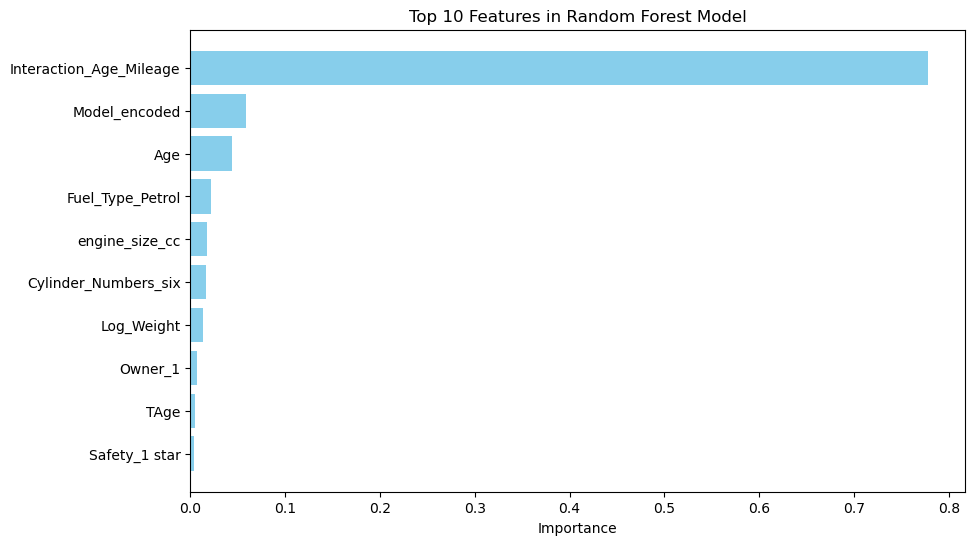

In [46]:
feature_importances = rf_reg.feature_importances_

# Get the names of the features
feature_names = xtrain.columns  # Assuming X contains your feature matrix

# Create a DataFrame to store feature importances along with their names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 features
top_10_features = feature_importance_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [47]:
feature_importance_df

,Feature,Importance
3,Interaction_Age_Mileage,0.778214
28,Model_encoded,0.059161
2,Age,0.043800
7,Fuel_Type_Petrol,0.022043
1,engine_size_cc,0.017389
20,Cylinder_Numbers_six,0.017143
4,Log_Weight,0.013370
29,Owner_1,0.006698
0,TAge,0.005450
13,Safety_1 star,0.004195


In [48]:
xtrain=xtrain.loc[:,['Interaction_Age_Mileage','Model_encoded','Age','Fuel_Type_Petrol','engine_size_cc','Cylinder_Numbers_six','Log_Weight','Owner_1','TAge','Safety_1 star']]


In [49]:
xtest=xtest.loc[:,['Interaction_Age_Mileage','Model_encoded','Age','Fuel_Type_Petrol','engine_size_cc','Cylinder_Numbers_six','Log_Weight','Owner_1','TAge','Safety_1 star']]


In [63]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=7)  # You can adjust n_estimators as needed

# Train the Random Forest model on the training set
rf_reg.fit(xtrain, ytrain)

# Predict on the training set
y_train_pred = rf_reg.predict(xtrain)

# Predict on the test set
y_test_pred = rf_reg.predict(xtest)



# Calculate RMSE for training and test sets
#rmse_train = np.sqrt(mean_squared_error(ytrain, y_train_pred))
rmse_rf_test = np.sqrt(mean_squared_error(ytest, y_test_pred))
rmse_rf_train=np.sqrt(mean_squared_error(ytrain, y_train_pred))
MAE_rf=mean_absolute_error(ytest, y_test_pred)
Rsquare_rf=r2_score(ytest, y_test_pred, multioutput='variance_weighted') 
    



print("RMSE on test set:", rmse_rf_test)
print("RMSE on train set:", rmse_rf_train)
print("MAE on testset:",MAE_rf)
print("r^2:",Rsquare_rf)


RMSE on test set: 2456.3915584220736
RMSE on train set: 851.5579937012176
MAE on testset: 1732.8877558954487
r^2: 0.9088502768787067


This is the final model with top 10 features selected. 
**Best model:** Random Forest
**Top Features:**
'Interaction_Age_Mileage','Model_encoded','Age','Fuel_Type_Petrol','engine_size_cc','Cylinder_Numbers_six','Log_Weight','Owner_1','TAge','Safety_1 star'